## Project Description

We used Latent Dirichlet allocation to determine topics covered in news articles, TV broadcasts, and tweets relating to COVID-19. Additionally, we analyze the sentiments (positive, negative, neutral) in the messages propagated by these outlets using sentiment analysis. 

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

### Scientific Articles

### News Outlets

#### Aljaz

In [144]:
aljaz_jan = pd.read_csv('ALJAZ.202001.csv')
aljaz_feb = pd.read_csv('ALJAZ.202002.csv')
aljaz_mar = pd.read_csv('ALJAZ.202003.csv')

aljaz = pd.concat([aljaz_jan, aljaz_feb, aljaz_mar]).reset_index(drop=True)
aljaz.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
aljaz.head()

,Snippet
0,coronavirus here where up here in beijing they...
1,a novel coronavirus a corona virus is a class ...
2,chinese government is i mean it took some time...
3,now on how authorities there are handling the ...
4,prevent you catching the coronavirus. where th...


#### BBC

In [145]:
bbc_jan = pd.read_csv('BBCNEWS.202001.csv')
bbc_feb = pd.read_csv('BBCNEWS.202002.csv')
bbc_mar = pd.read_csv('BBCNEWS.202003.csv')

bbc = pd.concat([bbc_jan, bbc_feb, bbc_mar]).reset_index(drop=True)
bbc.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
bbc.head()

,Snippet
0,"was a “- name. coronavirus, the stars virus wa..."
1,the sars or mers virus? it is called the coron...
2,the authorities there try to control the sprea...
3,typically found in bats. the sars virus and th...
4,oi' to try to know more. is it as severe or th...


#### RT

In [146]:
rt_jan = pd.read_csv('RT.202001.csv')
rt_feb = pd.read_csv('RT.202002.csv')
rt_mar = pd.read_csv('RT.202003.csv')

rt = pd.concat([rt_jan, rt_feb, rt_mar]).reset_index(drop=True)
rt.drop(['URL','MatchDateTime','Station','Show','IAShowID','IAPreviewThumb'], axis=1, inplace=True)
rt.head()

,Snippet
0,begin as concerns over the coronavirus of seei...
1,a coronavirus outbreak in china reaches 80 acc...
2,of a new virus and it's spreading like wildfir...
3,a new virus and it's spreading like wildfire a...
4,a new virus and it's spreading like wildfire a...


#### Fox News

In [147]:
FN_jan = pd.read_csv('FOXNEWS.202001.csv')
FN_feb = pd.read_csv('FOXNEWS.202002.csv')
FN_mar = pd.read_csv('FOXNEWS.202003.csv')

FN = pd.concat([FN_jan, FN_feb, FN_mar]).reset_index(drop=True)
FN.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True) 

FN.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


#### MSNBC

In [148]:
MSNBC_jan = pd.read_csv('FOXNEWS.202001.csv')
MSNBC_feb = pd.read_csv('FOXNEWS.202002.csv')
MSNBC_mar = pd.read_csv('FOXNEWS.202003.csv')

MSNBC = pd.concat([MSNBC_jan, MSNBC_feb, MSNBC_mar]).reset_index(drop=True)
MSNBC.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True) 
MSNBC.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


#### CNN

In [43]:
CNN_jan = pd.read_csv('FOXNEWS.202001.csv')
CNN_feb = pd.read_csv('FOXNEWS.202002.csv')
CNN_mar = pd.read_csv('FOXNEWS.202003.csv')

CNN = pd.concat([CNN_jan, CNN_feb, CNN_mar]).reset_index(drop=True)
CNN.drop(['URL', 'MatchDateTime', 'Station', 'Show', 'IAShowID', 'IAPreviewThumb'], axis = 1, inplace = True)
CNN.head()

,Snippet
0,"missed contraption, what is the coronavirus? w..."
1,you for coming on this morning in response to ...
2,what what the onion did. new case of the coron...
3,deadly coronavirus is a global emergency. the ...
4,today the world health organization will decid...


### Tweets

In [150]:
feb_tweets = pd.read_csv('feb_data.csv')
march_tweets = pd.read_csv('march_data.csv')
april_tweets = pd.read_csv('april_data.csv')

tweets = pd.concat([feb_tweets, march_tweets, april_tweets]).reset_index(drop=True)
tweets.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True) 
tweets.rename(columns = {'text' : 'Snippet'}, inplace = True)
tweets.head()

,Snippet
0,Head nurse Cai Liping of Wuchang Hospital died...
1,This bacteria-killing UV light robot helps a W...
2,For those that are into the business side of s...
3,How to fight against #coronavirus in #japan
4,Diseases like covid-19 are deadlier in non-dem...


## LDA Analysis

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [7]:
def print_topics(topics,vectorizer):
    """
    Prints top 12 most important words for each topic in descending importance
    """
    topic_dists = (topics.components_.T / topics.components_.sum(axis=1)).T
    for comp in range(len(topic_dists)):
        top_i = np.argsort(topic_dists[comp])[-12:][::-1]
        print()
        print([key for key, value in vectorizer.vocabulary_.items() if value in top_i])

In [8]:
def lda(source, 
        month1Data, month2Data, month3Data, 
        month1, month2, month3, 
        chartTitle):
    all_counts = all_vectorizer.fit_transform(source.Snippet)
    all_as_topics = LatentDirichletAllocation(n_components=5, random_state=0, n_jobs=6).fit(all_counts)
    
    print_topics(all_as_topics, all_vectorizer)
    
    # Classify into topics
    source_dists = all_as_topics.transform(all_counts)
    source_labels = np.argmax(source_dists, axis=1)
    source = source.assign(source_labels= source_labels)
    
    # Label tweets by month
    months = pd.Series([month1] * month1Data.shape[0] + [month2] * month2Data.shape[0] + [month3] * month3Data.shape[0])
    source = source.assign(month=months)

    # Get news source counts for each topic
    topic_counts = source.groupby(['source_labels','month']).count()
    topic_counts.columns =['monthly_count']

    unstacked_topics = topic_counts.unstack()
    unstacked_topics = unstacked_topics.monthly_count
    unstacked_topics = unstacked_topics.reindex(columns=[month1, month2, month3])

    print(unstacked_topics)
    
    # Plot monthly counts for each topic
    unstacked_topics.plot.bar(figsize=(15,10))
    plt.title(chartTitle)
    plt.xlabel('Topic')
    plt.ylabel('Snippet Count')
    plt.show()

### News Source LDA analysis

In [142]:
my_stops = text.ENGLISH_STOP_WORDS.union(
    
    ['covid', 'coronavirus', 'SARS', 'corona', 'sick',
    'Covid', 'Corona virus', 'Corona', '19', 'hey', 'sars', 'virus', 'covid_19', 
    'just', 'day', 'today', 'new', 'got', 'pandemic', 'death', 'crisis', 'covid19', 'china', 'chinese', 'China','Chinese',
    '2020', 'like', 'people', 'died', 'spread', 'al', 'jazeera', 'abc','bbc','cnn', 'reporter',
    'tonight','patients','confirmed','home','breaking','news', 'outbreak', 'country', 'com', 'www', 'http', 'https', 'said',
    '000', "00"]

)
all_vectorizer = CountVectorizer(min_df=10, stop_words=my_stops)

NameError: name 'text' is not defined

#### Al Jazeera


['government', '1st', 'health', 'say', 'infected', 'hong', 'kong', 'person', 'president', 'year', 'medical', 'workers']

['beijing', 'government', 'cases', 'quarantine', 'city', 'tested', 'japan', 'positive', 'passengers', 'cruise', 'ship', 'italy']

['world', 'public', 'travel', 'restrictions', 'impact', 'contain', 'countries', 'economic', 'south', 'measures', 'spreading', 'economy']

['cases', 'health', 'says', 'world', 'organization', 'killed', 'number', '00', 'reported', 'global', 'deaths', 'infections']

['government', 'health', 'says', 'don', 'right', 'going', 'know', 'think', 'said', 'lot', 'really', 've']
month          January  February  March
source_labels                          
0                  656       907    711
1                  655       906    780
2                  508       652   1158
3                  939      1476   1042
4                  947      1059   1004


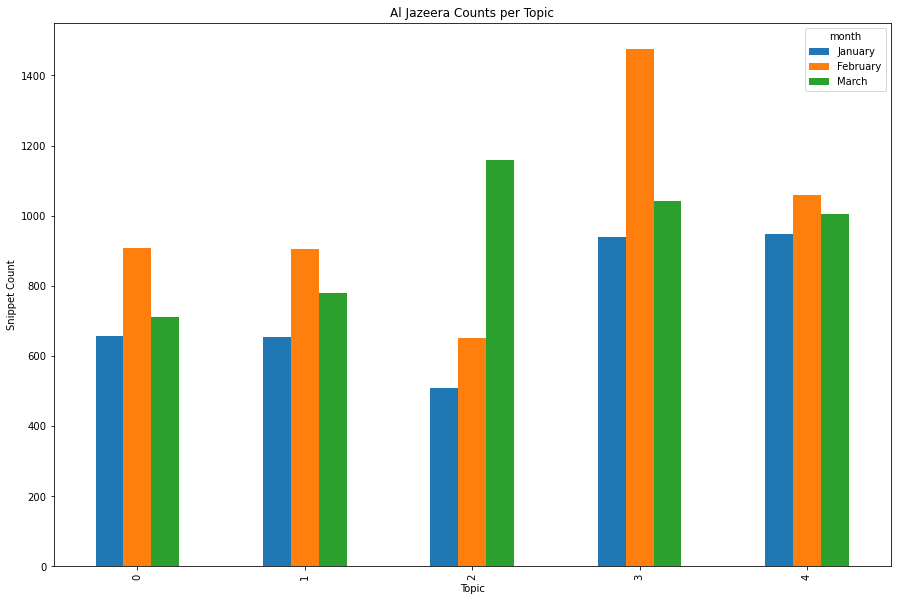

In [10]:
lda(aljaz, 
    aljaz_jan, aljaz_feb, aljaz_mar, 
    'January', 'February','March', 
    'Al Jazeera Counts per Topic')

#### BBC


['world', 'uk', 'global', 'cases', 'impact', 'let', 'says', 'fears', 'business', 'government', 'markets', 'italy']

['deaths', 'authorities', 'wuhan', 'city', 'world', 'killed', 'cases', 'travel', 'infected', 'number', 'headlines', 'year']

['uk', 'british', 'cases', 'quarantine', 'passengers', 'positive', 'hospital', 'board', 'cruise', 'ship', 'tested', 'princess']

['know', 'spreading', 'don', 'lot', 'going', 'think', 'vaccine', 'trump', 'time', 'things', 'work', 'hands']

['world', 'health', 'organization', 'uk', 'public', 'cases', 'said', 'number', 'says', 'medical', 'government', 'england']
month          January  February  March
source_labels                          
0                  374       972   1259
1                 1570       935    571
2                  343      1094    742
3                 1092      1039   1357
4                  563       960   1071


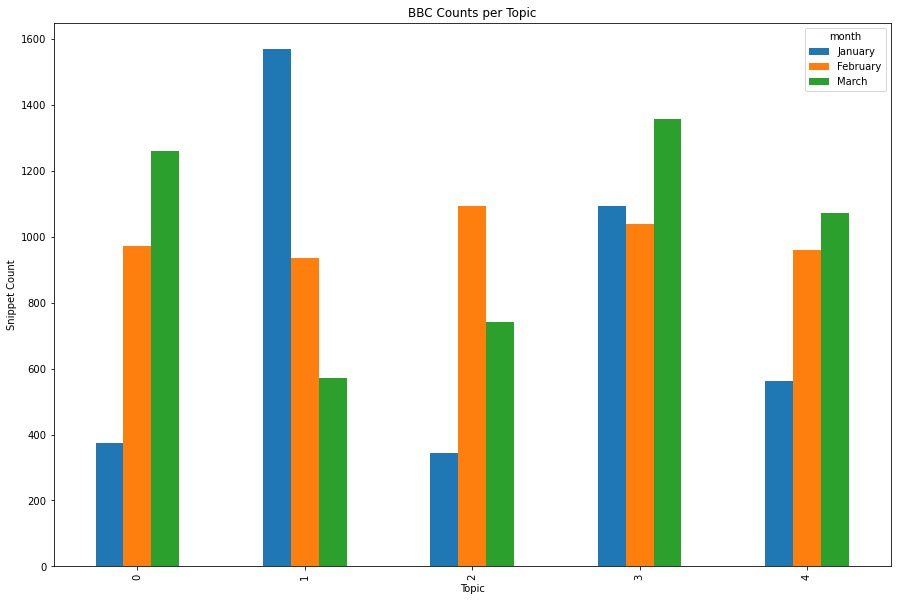

In [11]:
lda(bbc, 
    bbc_jan, bbc_feb, bbc_mar, 
    'January', 'February','March', 
    'BBC Counts per Topic')

#### Reuters


['right', 'economy', 'know', 'markets', 'let', 'mean', 'going', 'lot', 'really', 'think', 'market', 've']

['right', 'know', 'deadly', 'situation', 'russian', 'going', 'don', 'market', 'coming', 'money', 'problem', 'information']

['know', 'world', 'health', 'organization', 'deal', 'cases', 'russia', '1st', 'situation', 'russian', 'quarantine', 'measures']

['percent', 'world', 'fears', 'russia', 'moscow', 'oil', 'europe', 'week', 'don', 'quarantine', 'time', 'information']

['00', 'infected', 'countries', 'world', 'health', 'number', 'cases', 'russia', '1st', 'outside', 'year', 'united']
month          January  February  March
source_labels                          
0                  208      1189    617
1                  119       659    373
2                  196       618    319
3                  162       586    625
4                  391       977    495


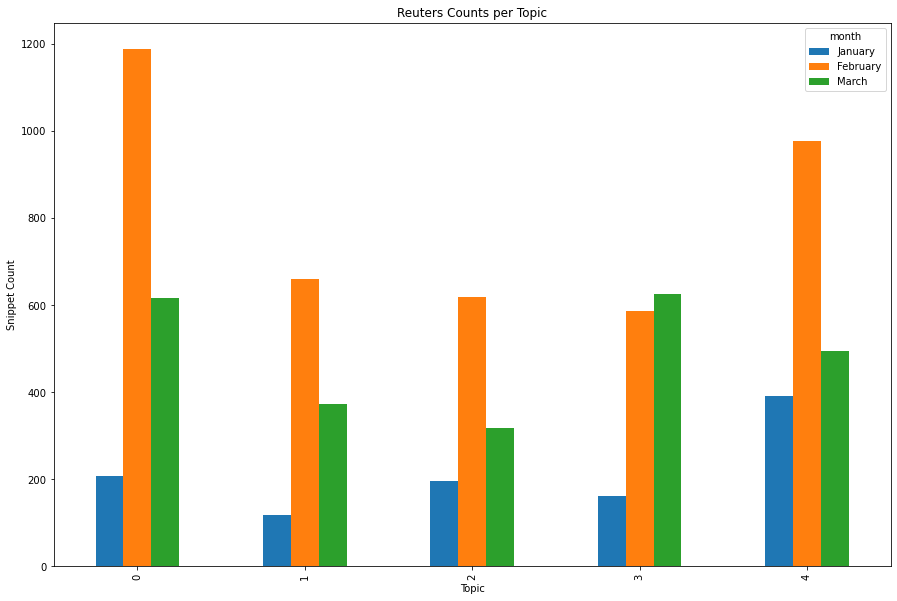

In [12]:
lda(rt, 
    rt_jan, rt_feb, rt_mar, 
    'January', 'February', 'March',
    'Reuters Counts per Topic')

#### Fox News


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


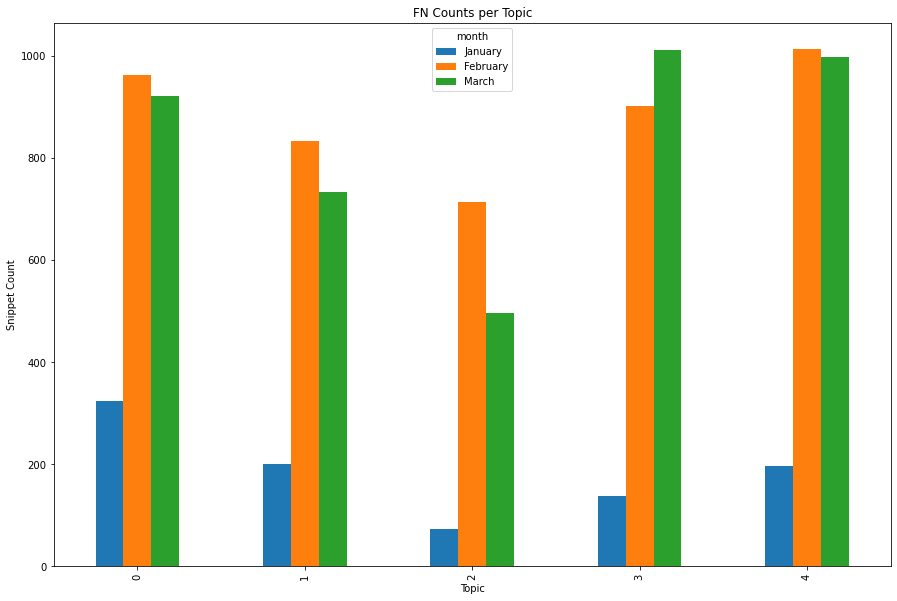

In [35]:
lda(FN, 
    FN_jan, FN_feb, FN_mar, 
    'January', 'February','March', 
    'FN Counts per Topic')

#### MSNBC


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


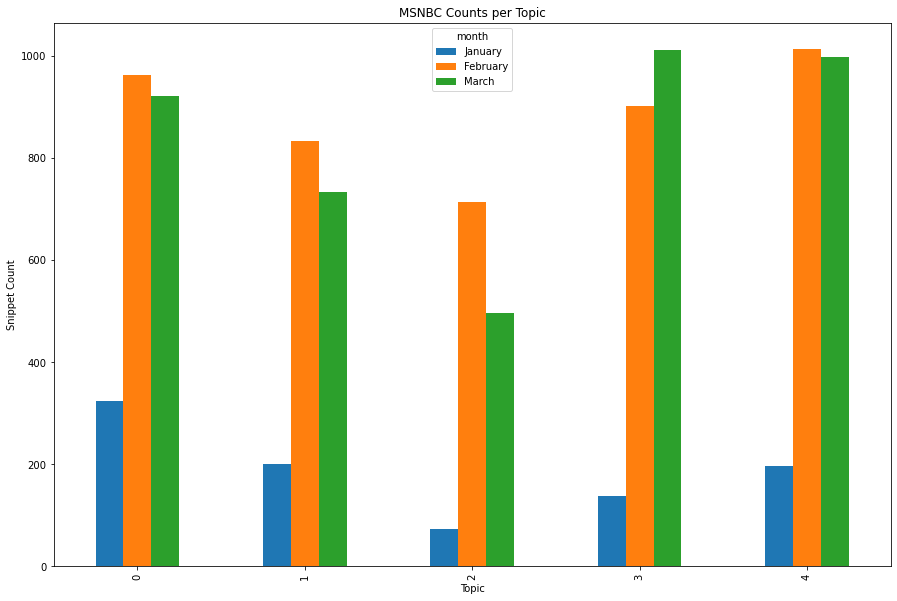

In [43]:
lda(MSNBC, 
    MSNBC_jan, MSNBC_feb, MSNBC_mar, 
    'January', 'February','March', 
    'MSNBC Counts per Topic')

#### CNN


['case', 'states', 'health', 'cases', 'know', 'flu', 'going', 'deaths', 'right', 'united', 'state', 'number']

['morning', 'global', 'world', 'cases', 'trump', 'fears', 'ed', 'markets', 'president', 'market', 'sandra', 'thank']

['quarantined', 'americans', 'tested', 'president', 'california', 'passengers', 'cruise', 'quarantine', 'japan', 'ship', 'positive', 'princess']

['white', 'house', 'don', 'know', 'think', 'going', 'vaccine', 'right', 'trump', 'want', 'president', 'lot']

['did', 'health', 'don', 'know', 'going', 'medical', 'trump', 'risk', 'president', 'public', 'need', 'democrats']
month          January  February  March
source_labels                          
0                  324       962    922
1                  201       833    733
2                   74       714    496
3                  138       901   1011
4                  197      1014    997


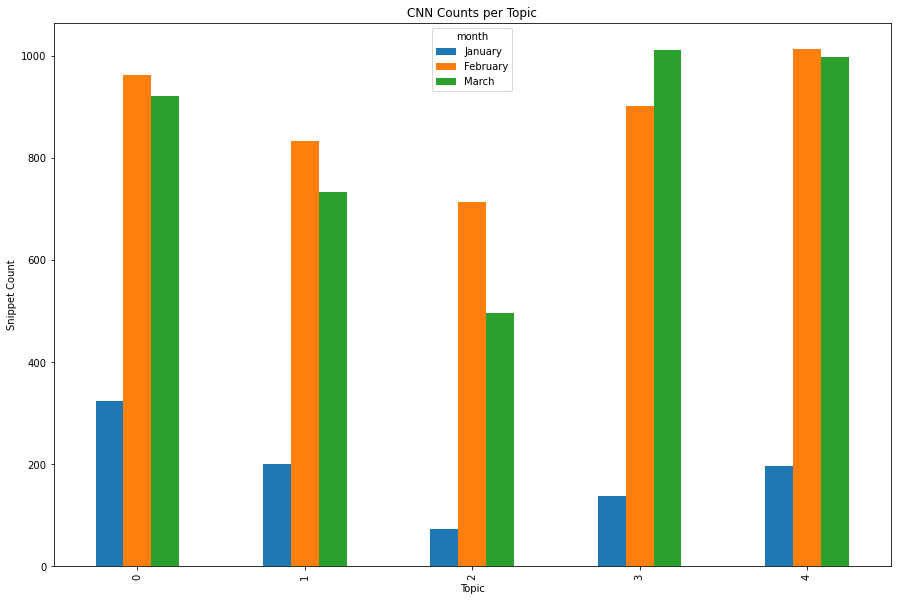

In [44]:
lda(CNN, 
    CNN_jan, CNN_feb, CNN_mar, 
    'January', 'February','March', 
    'CNN Counts per Topic')

#### Twitter


['hospital', 'wuhan', 'time', 'fight', 'amp', 'response', 've', 'really', 'medical', 'old', 'states', 'let']

['says', 'japan', 'twitter', 'pic', 'cruise', 'ship', 'positive', 'trump', 'negative', 'tested', 'test', 'president']

['free', 'amp', 'world', 'uk', 'global', 'bit', 'ly', 'quarantine', 'health', 'public', 'reut', 'rs']

['wuhan', 'time', 'care', 'flu', 'amp', 'number', 'deaths', 'reports', 'cases', 'health', 'iran', 'reported']

['need', 'amp', 'help', 'watch', 'make', 'apple', 'don', 'know', 'trump', 'workers', 'support', 'way']
month          February  March  April
source_labels                        
0                   446    525    726
1                   424    492    397
2                   523    451    484
3                   575    434    382
4                   532    598    511


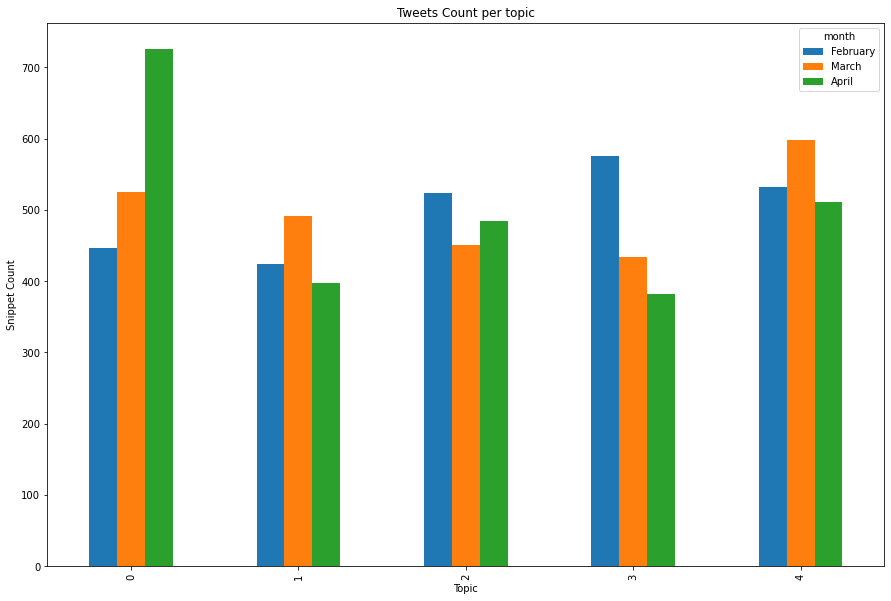

In [29]:
lda(tweets,
    feb_tweets, march_tweets, april_tweets,
    "February", "March", "April",
    "Tweets Count per topic")

### Interpretation of Results

We chose to focus on three seemingly different news outlets: Al Jazeera (a Qatari TV channel), BBC (a British news source), and Reuters (a news source largely concerned with financial market data). The characteristics of these outlets are reflected in the topics uncovered using LDA. The stop words we used were common to all the news sources so that we could uncover any true topic differences between them. 

Al Jazeera broadcast a lot of information about the state of the virus worldwide. We found topics with key words such as travel, south, hong, kong, beijing, travel, global, and countries. Notably, we saw that a topic with key words 'world', 'public', 'travel', 'restrictions', 'spreading', and 'economy' had increasing occurrences from January to March. This topic was likely about the fall-out of the spread of the virus (on travel restrictions and the economy for example).

BBC on the other hand expectedly had a lot more content pertaining to Britain; multiple topics contained key words such as uk, british, and england. The second topic saw a lot more occurences in January and then decreased in mention in the following months. This topic was likely about Chinese cases since it contained key words "wuhan" and "travel." 

Reuters expectedly had more financial topics. Many topics share key words economy, markets, and money. Many topics also contain the world "global," indicating that Reuters was likely looking at financial trends around the world. The first topic with key words "think," "economy," and "markets" possibly contains all the broadcasts reacting to the Chinese economy shutting down in January since the number of occurrences for this topic peaks in February.   

## Sentiment Analysis

In [45]:
# import vader sentiment analysis module and word tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:
#initialize vader module
sid = SentimentIntensityAnalyzer()

In [197]:
# splits text into sentences/words
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [198]:
# print sentiment distribution for entire snippet collection 
def sentimentDistributionCalc(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                print("POS", snippet)
                posNum += 1
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                print("NEG", snippet)
                negNum += 1

    
    total = posNum+negNum+neuNum

    print("Percentage positive:", (posNum/total)*100)
    print("Percentage negative:", (negNum/total)*100)
    print("Percentage neutral:", (neuNum/total)*100)
    print("negative:positive ratio", negNum/posNum)

In [221]:
# print sentiment distribution for entire snippet collection 
def makePie(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1
    
    df = pd.DataFrame(
        {'sentiment': ['Positive', 'Negative', 'Neutral'],
       'count': [posNum, negNum, neuNum]},
        index=['Positive', 'Negative','Neutral']
        )
    
    plot = df.plot.pie(y='count', figsize=(7, 7))
    
    df2 = pd.DataFrame(
        {'sentiment': ['Positive', 'Negative'],
       'count': [posNum, negNum]}, 
        index=['Positive', 'Negative']
        )
    
    plot = df2.plot.pie(y='count', figsize=(7, 7))

In [222]:
# generating list of all broadcast snippets
bbcSnippets = []
for e in bbc[bbc.columns[0]]: 
    bbcSnippets.append(e)

In [219]:
# tokenize the entire body of broadcast snippets
bbcSnippetsTokenized = tokenizer.tokenize(''.join(bbcSnippets))

In [210]:
sentimentDistributionCalc(bbcSnippetsTokenized)

NEG _and breathing difficulties.
NEG _and breathing difficulties.
NEG _and breathing difficulties.
NEG _and breathing difficulties.
NEG that killed more thanmore preparedness.
NEG that killed more thanmore preparedness.
NEG that killed more thanmore preparedness.
NEG that killed more thanmore preparedness.
NEG is the killer virus here?
NEG is the killer virus here?
NEG is the killer virus here?
NEG is the killer virus here?
POS yes, good evening.
POS yes, good evening.
POS yes, good evening.
POS yes, good evening.
POS lovely to see you.
POS lovely to see you.
POS lovely to see you.
POS lovely to see you.
NEG -- five suspects.
NEG -- five suspects.
NEG -- five suspects.
NEG -- five suspects.
POS thanks.
POS thanks.
POS thanks.
POS thanks.
POS a boost for hs2.
POS a boost for hs2.
POS a boost for hs2.
POS a boost for hs2.
POS a boost for hsz.
POS a boost for hsz.
POS a boost for hsz.
POS a boost for hsz.
POS a boost for hs2.
POS a boost for hs2.
POS a boost for hs2.
POS a boost for hs2.


POS yes.
POS yes.
POS yes.
POS yes.
NEG -- five suspects.
NEG -- five suspects.
NEG -- five suspects.
NEG -- five suspects.
POS yes.
POS yes.
POS yes.
POS yes.
POS yeah, a mask.
POS yeah, a mask.
POS yeah, a mask.
POS yeah, a mask.
POS goggles as well.
POS goggles as well.
POS goggles as well.
POS goggles as well.
POS yes.
POS yes.
POS yes.
POS yes.
POS rich preston, bbcthe safety of health globally.
POS rich preston, bbcthe safety of health globally.
POS rich preston, bbcthe safety of health globally.
POS rich preston, bbcthe safety of health globally.
NEG and after a failure to treat a virus, which attacked his heart, he died there.
NEG and after a failure to treat a virus, which attacked his heart, he died there.
NEG and after a failure to treat a virus, which attacked his heart, he died there.
NEG and after a failure to treat a virus, which attacked his heart, he died there.
NEG every parent's worst nightmare.
NEG every parent's worst nightmare.
NEG every parent's worst nightmare.


NEG nearby in daegu, the worst affected area, they've created several crisis centres.
NEG nearby in daegu, the worst affected area, they've created several crisis centres.
NEG nearby in daegu, the worst affected area, they've created several crisis centres.
NEG nearby in daegu, the worst affected area, they've created several crisis centres.
POS good morning.
POS good morning.
POS good morning.
POS good morning.
POS coronavirus care.
POS coronavirus care.
POS coronavirus care.
POS coronavirus care.
NEG infact, no virus.
NEG infact, no virus.
NEG infact, no virus.
NEG infact, no virus.
NEG but that's no guarantee.
NEG but that's no guarantee.
NEG but that's no guarantee.
NEG but that's no guarantee.
NEG secondly, a lot of worry -- worried company.
NEG secondly, a lot of worry -- worried company.
NEG secondly, a lot of worry -- worried company.
NEG secondly, a lot of worry -- worried company.
NEG secondly, a lot of worry -- worried company.
NEG secondly, a lot of worry -- worried company

POS applause .
POS applause .
POS applause .
POS applause .
NEG mumps typically passes with no lasting damage.
NEG mumps typically passes with no lasting damage.
NEG mumps typically passes with no lasting damage.
NEG mumps typically passes with no lasting damage.
POS yeah.
POS yeah.
POS yeah.
POS yeah.
NEG the things that stop flu also stop this virus.
NEG the things that stop flu also stop this virus.
NEG the things that stop flu also stop this virus.
NEG the things that stop flu also stop this virus.
POS well, that's a really interesting question.
POS well, that's a really interesting question.
POS well, that's a really interesting question.
POS well, that's a really interesting question.
NEG but now the fear is turning to anger.
NEG but now the fear is turning to anger.
NEG but now the fear is turning to anger.
NEG but now the fear is turning to anger.
NEG importantly, this virus can kill people.
NEG importantly, this virus can kill people.
NEG importantly, this virus can kill peopl

POS thank you so much, thank you.
POS thank you so much, thank you.
POS thank you so much, thank you.
POS thank you so much, thank you.
NEG chris masonjoins me now.we're fighting fake news.
NEG chris masonjoins me now.we're fighting fake news.
NEG chris masonjoins me now.we're fighting fake news.
NEG chris masonjoins me now.we're fighting fake news.
NEG thisabsolutely another miserable winter.
NEG thisabsolutely another miserable winter.
NEG thisabsolutely another miserable winter.
NEG thisabsolutely another miserable winter.
NEG four i confirmed dead.
NEG four i confirmed dead.
NEG four i confirmed dead.
NEG four i confirmed dead.
NEG no longer north,hello.
NEG no longer north,hello.
NEG no longer north,hello.
NEG no longer north,hello.
POS thank you.
POS thank you.
POS thank you.
POS thank you.
POS after super tuesday primarieshello and welcome.
POS after super tuesday primarieshello and welcome.
POS after super tuesday primarieshello and welcome.
POS after super tuesday primarieshel

NEG and struggling to pay my rent.
NEG and struggling to pay my rent.
NEG and struggling to pay my rent.
NEG and struggling to pay my rent.
POS -- yes.
POS -- yes.
POS -- yes.
POS -- yes.
POS definitely not.
POS definitely not.
POS definitely not.
POS definitely not.
POS yes.
POS yes.
POS yes.
POS yes.
NEG even funerals are now banned, replaced with a restricted blessing.
NEG even funerals are now banned, replaced with a restricted blessing.
NEG even funerals are now banned, replaced with a restricted blessing.
NEG even funerals are now banned, replaced with a restricted blessing.
POS the# happy birthday to you, happy birthday to you.
POS the# happy birthday to you, happy birthday to you.
POS the# happy birthday to you, happy birthday to you.
POS the# happy birthday to you, happy birthday to you.
POS thanks.
POS thanks.
POS thanks.
POS thanks.
POS byweekend, take care.
POS byweekend, take care.
POS byweekend, take care.
POS byweekend, take care.
POS a very warm welcome to bbc news.
POS

POS good question.
POS good question.
POS good question.
POS good question.
POS -- major support.
POS -- major support.
POS -- major support.
POS -- major support.
NEG seasonal flu perspective.
NEG seasonal flu perspective.
NEG seasonal flu perspective.
NEG seasonal flu perspective.
POS important context.
POS important context.
POS important context.
POS important context.
POS thank you both for your reassuring words.
POS thank you both for your reassuring words.
POS thank you both for your reassuring words.
POS thank you both for your reassuring words.
POS well done.
POS well done.
POS well done.
POS well done.
NEG empty.
NEG empty.
NEG empty.
NEG empty.
POS good afternoon.
POS good afternoon.
POS good afternoon.
POS good afternoon.
POS yes, it does.
POS yes, it does.
POS yes, it does.
POS yes, it does.
NEG unfortunately, in a competitive market, companies do fail.
NEG unfortunately, in a competitive market, companies do fail.
NEG unfortunately, in a competitive market, companies do f

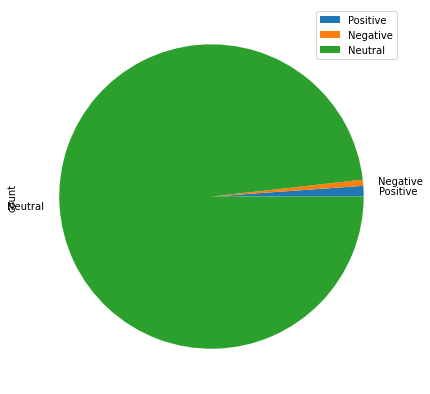

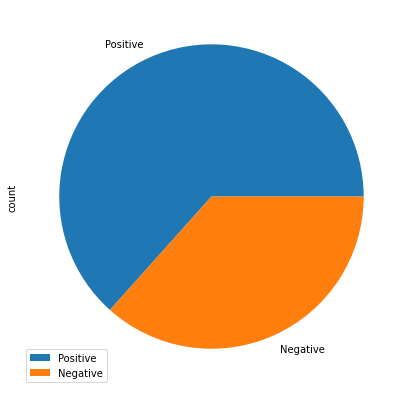

In [223]:
makePie(bbcSnippetsTokenized)

In [224]:
aljazSnippets = []
for e in aljaz[aljaz.columns[0]]: 
    aljazSnippets.append(e)

aljazeeraSnippetsTokenized = tokenizer.tokenize(''.join(aljazSnippets))

sentimentDistributionCalc(aljazeeraSnippetsTokenized)

NEG fear of.
NEG fear of.
NEG fear of.
NEG fear of.
NEG refugee crisis.
NEG refugee crisis.
NEG refugee crisis.
NEG refugee crisis.
POS just make sure.
POS just make sure.
POS just make sure.
POS just make sure.
NEG brazil's worst industrial disaster almost a year ago.
NEG brazil's worst industrial disaster almost a year ago.
NEG brazil's worst industrial disaster almost a year ago.
NEG brazil's worst industrial disaster almost a year ago.
NEG war.
NEG war.
NEG war.
NEG war.
POS parts of the great wallnew year holiday.
POS parts of the great wallnew year holiday.
POS parts of the great wallnew year holiday.
POS parts of the great wallnew year holiday.
POS just make sure.
POS just make sure.
POS just make sure.
POS just make sure.
POS throughout the day safe and saved.
POS throughout the day safe and saved.
POS throughout the day safe and saved.
POS throughout the day safe and saved.
POS thank you.
POS thank you.
POS thank you.
POS thank you.
POS or miracle that is.
POS or miracle that 

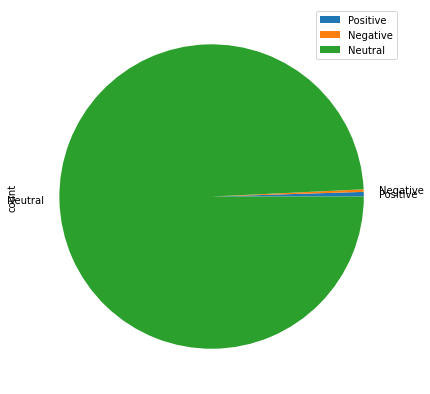

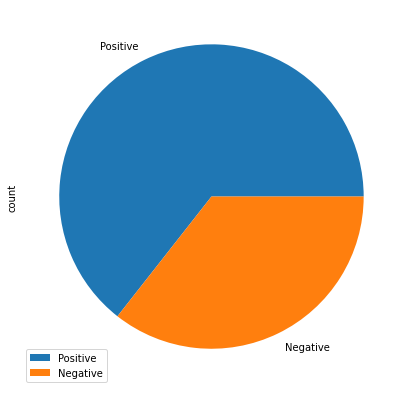

In [230]:
makePie(aljazeeraSnippetsTokenized)

In [226]:
rtSnippets = []
for e in rt[rt.columns[0]]: 
    rtSnippets.append(e)

rtSnippetsTokenized = tokenizer.tokenize(''.join(rtSnippets))

sentimentDistributionCalc(rtSnippetsTokenized)

NEG when it disgustingly ironic thatchina.
NEG when it disgustingly ironic thatchina.
NEG when it disgustingly ironic thatchina.
NEG when it disgustingly ironic thatchina.
NEG when it disgustingly ironic thatmade in china.
NEG when it disgustingly ironic thatmade in china.
NEG when it disgustingly ironic thatmade in china.
NEG when it disgustingly ironic thatmade in china.
NEG contradictory were things.
NEG contradictory were things.
NEG contradictory were things.
NEG contradictory were things.
NEG torture techniques during america's war on terror admits he would do it again.
NEG torture techniques during america's war on terror admits he would do it again.
NEG torture techniques during america's war on terror admits he would do it again.
NEG torture techniques during america's war on terror admits he would do it again.
POS welcome.
POS welcome.
POS welcome.
POS welcome.
POS the growth of the epidemic is excel.
POS the growth of the epidemic is excel.
POS the growth of the epidemic is 

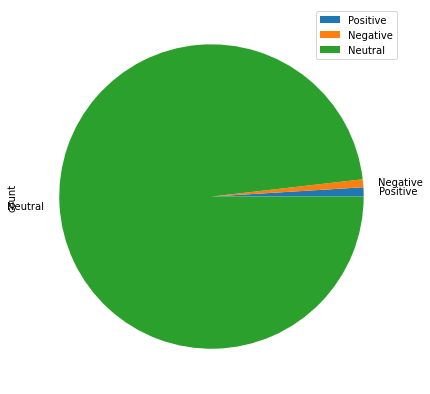

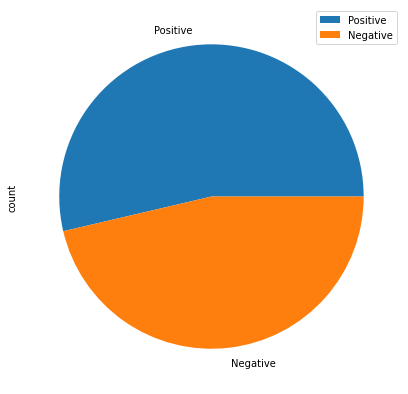

In [231]:
makePie(rtSnippetsTokenized)

In [228]:
tweetSnippets = []
for e in tweets[tweets.columns[0]]: 
    tweetSnippets.append(e)

tweetsTokenized = tokenizer.tokenize(''.join(tweetSnippets))

sentimentDistributionCalc(tweetsTokenized)

POS Great example of an important truth: The free flow of information is almost always a very good thing.
POS Great example of an important truth: The free flow of information is almost always a very good thing.
POS Great example of an important truth: The free flow of information is almost always a very good thing.
POS Great example of an important truth: The free flow of information is almost always a very good thing.
NEG 102000 dead.
NEG 102000 dead.
NEG 102000 dead.
NEG 102000 dead.
NEG A second flu would be awful.
NEG A second flu would be awful.
NEG A second flu would be awful.
NEG A second flu would be awful.
POS I appreciate you all.
POS I appreciate you all.
POS I appreciate you all.
POS I appreciate you all.
NEG I'm CONFUSED.
NEG I'm CONFUSED.
NEG I'm CONFUSED.
NEG I'm CONFUSED.
POS So proud of them.
POS So proud of them.
POS So proud of them.
POS So proud of them.
POS me: cool!!!
POS me: cool!!!
POS me: cool!!!
POS me: cool!!!
POS Diamond Princess.
POS Diamond Princess.
POS 

POS Please stay alert.
POS Please stay alert.
POS Please stay alert.
POS Please stay alert.
POS Good job Cambodia.
POS Good job Cambodia.
POS Good job Cambodia.
POS Good job Cambodia.
NEG Netizens: No nurses?
NEG Netizens: No nurses?
NEG Netizens: No nurses?
NEG Netizens: No nurses?
NEG Death camp more like.
NEG Death camp more like.
NEG Death camp more like.
NEG Death camp more like.
POS But what's better than best?
POS But what's better than best?
POS But what's better than best?
POS But what's better than best?
POS Twitter friends.
POS Twitter friends.
POS Twitter friends.
POS Twitter friends.
NEG Tokyo is also infected.
NEG Tokyo is also infected.
NEG Tokyo is also infected.
NEG Tokyo is also infected.
POS I wish for peace around the world.
POS I wish for peace around the world.
POS I wish for peace around the world.
POS I wish for peace around the world.
POS Don’t laugh.
POS Don’t laugh.
POS Don’t laugh.
POS Don’t laugh.
NEG And it’s very, very bad, unfortunately.
NEG And it’s ver

NEG I AM SCREAMING!!
NEG I AM SCREAMING!!
NEG I AM SCREAMING!!
NEG I AM SCREAMING!!
NEG Stress eats lasagna.
NEG Stress eats lasagna.
NEG Stress eats lasagna.
NEG Stress eats lasagna.
POS haha just kidding!
POS haha just kidding!
POS haha just kidding!
POS haha just kidding!
POS Texas deserves better.
POS Texas deserves better.
POS Texas deserves better.
POS Texas deserves better.
POS nice priorities, Senator.
POS nice priorities, Senator.
POS nice priorities, Senator.
POS nice priorities, Senator.
POS Cheers.
POS Cheers.
POS Cheers.
POS Cheers.
POS All they care about is profit.
POS All they care about is profit.
POS All they care about is profit.
POS All they care about is profit.
POS Hopefully this works.
POS Hopefully this works.
POS Hopefully this works.
POS Hopefully this works.
NEG 10/10 coronavirus stopped dead in its tracks.
NEG 10/10 coronavirus stopped dead in its tracks.
NEG 10/10 coronavirus stopped dead in its tracks.
NEG 10/10 coronavirus stopped dead in its tracks.
POS 

POS Call a friend 9.
POS Call a friend 9.
POS Call a friend 9.
POS Call a friend 9.
NEG Put your sorry ass in quarantine.
NEG Put your sorry ass in quarantine.
NEG Put your sorry ass in quarantine.
NEG Put your sorry ass in quarantine.
POS Proud.
POS Proud.
POS Proud.
POS Proud.
NEG Muchinguri’s disgusting statement showcases the incompetence, ignorance & callousness of the regime.
NEG Muchinguri’s disgusting statement showcases the incompetence, ignorance & callousness of the regime.
NEG Muchinguri’s disgusting statement showcases the incompetence, ignorance & callousness of the regime.
NEG Muchinguri’s disgusting statement showcases the incompetence, ignorance & callousness of the regime.
NEG Ignorant.
NEG Ignorant.
NEG Ignorant.
NEG Ignorant.
NEG - Doesn't matter anymore: Lagarde is dead meat.
NEG - Doesn't matter anymore: Lagarde is dead meat.
NEG - Doesn't matter anymore: Lagarde is dead meat.
NEG - Doesn't matter anymore: Lagarde is dead meat.
NEG It destroys lungs.
NEG It destro

NEG They tested negative.
NEG They tested negative.
NEG They tested negative.
NEG They tested negative.
NEG I’m having major panic attacks.
NEG I’m having major panic attacks.
NEG I’m having major panic attacks.
NEG I’m having major panic attacks.
POS Great wartime leaders have the common trait of being great truth tellers.
POS Great wartime leaders have the common trait of being great truth tellers.
POS Great wartime leaders have the common trait of being great truth tellers.
POS Great wartime leaders have the common trait of being great truth tellers.
NEG Trump’s a total failure in the war against COVID-19.
NEG Trump’s a total failure in the war against COVID-19.
NEG Trump’s a total failure in the war against COVID-19.
NEG Trump’s a total failure in the war against COVID-19.
NEG Corona is a bitch?
NEG Corona is a bitch?
NEG Corona is a bitch?
NEG Corona is a bitch?
NEG Give em hell, Terry!
NEG Give em hell, Terry!
NEG Give em hell, Terry!
NEG Give em hell, Terry!
POS Hope you will to

NEG RESIGN Trudeau!!!
NEG RESIGN Trudeau!!!
NEG RESIGN Trudeau!!!
NEG RESIGN Trudeau!!!
POS Let us spread love, light, and a helping hand!
POS Let us spread love, light, and a helping hand!
POS Let us spread love, light, and a helping hand!
POS Let us spread love, light, and a helping hand!
NEG No test required.
NEG No test required.
NEG No test required.
NEG No test required.
NEG Fire kills COVID-19 too.
NEG Fire kills COVID-19 too.
NEG Fire kills COVID-19 too.
NEG Fire kills COVID-19 too.
POS (শুভ সকাল) I am a brave freedom fighter Dr. Md.
POS (শুভ সকাল) I am a brave freedom fighter Dr. Md.
POS (শুভ সকাল) I am a brave freedom fighter Dr. Md.
POS (শুভ সকাল) I am a brave freedom fighter Dr. Md.
POS Trusted government 6.
POS Trusted government 6.
POS Trusted government 6.
POS Trusted government 6.
NEG Seriously, Coronavirus is racist.
NEG Seriously, Coronavirus is racist.
NEG Seriously, Coronavirus is racist.
NEG Seriously, Coronavirus is racist.
NEG Coronavirus is racist.
NEG Coronavir

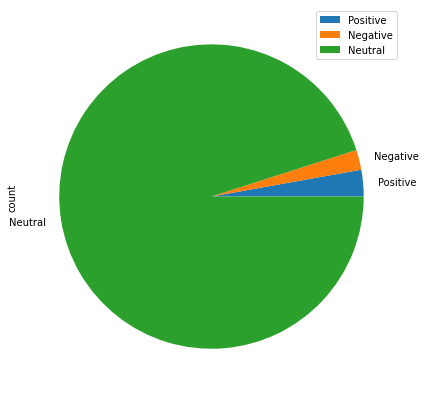

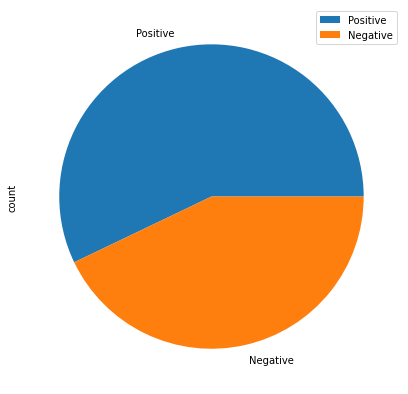

In [232]:
makePie(tweetsTokenized)

### Interpretation of Results

The sentiment across all of the media platforms is largely neutral. However, there is an interesting difference between positive and neutral sentiment when it comes to news sources versus tweets. News sources consistently have more negative content (as indicated by a higher ratio of positively-scored content to negatively-scored content across TV broadcast snippets). Yet, tweets have a nearly one-to-one positive-to-negative sentiment ratio. This discrepancy may be because news sources having to report the dire outfall of the virus, while tweets also include messages of hope and support. 